In [1]:
%%bash
mkdir -p /content/app
cd /content/app
git clone https://github.com/pjreddie/darknet
cd /content/app/darknet
make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

Cloning into 'darknet'...


In [3]:
%%bash
cd /content/app/darknet
wget https://pjreddie.com/media/files/yolov3.weights

--2018-08-03 11:26:56--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

     0K .......... .......... .......... .......... ..........  0%  693K 5m50s
    50K .......... .......... .......... .......... ..........  0%  689K 5m50s
   100K .......... .......... .......... .......... ..........  0% 91.5M 3m54s
   150K .......... .......... .......... .......... ..........  0% 10.2M 3m2s
   200K .......... .......... .......... .......... ..........  0%  737K 3m31s
   250K .......... .......... .......... .......... ..........  0%  106M 2m56s
   300K .......... .......... .......... .......... ..........  0% 8.40M 2m35s
   350K .......... .......... .......... .......... ..........  0% 8.21M 2m19s
   400K .......... .......... ..........

In [4]:
%%bash
cd /content/app/darknet
./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

data/dog.jpg: Predicted in 10.617877 seconds.
dog: 99%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

In [23]:
%%bash
cd /content/app/darknet
#wget http://pet-seikatsu.jp/images/2015/12/38d4740a96de995f495da92b70a429a1.jpg -O test.jpg
wget https://blogsimages.adobe.com/creativestation/files/2017/02/AdobeStock_101320773.jpeg -O test.jpg

./darknet detect cfg/yolov3.cfg yolov3.weights test.jpg

test.jpg: Predicted in 11.651535 seconds.
cat: 95%
cat: 92%


--2018-08-03 11:57:51--  https://blogsimages.adobe.com/creativestation/files/2017/02/AdobeStock_101320773.jpeg
Resolving blogsimages.adobe.com (blogsimages.adobe.com)... 23.46.53.114, 2600:1402:2000:1a7::11e2, 2600:1402:2000:187::11e2
Connecting to blogsimages.adobe.com (blogsimages.adobe.com)|23.46.53.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2133671 (2.0M) [image/jpeg]
Saving to: ‘test.jpg’

     0K .......... .......... .......... .......... ..........  2%  412K 5s
    50K .......... .......... .......... .......... ..........  4%  791K 4s
   100K .......... .......... .......... .......... ..........  7%  869K 3s
   150K .......... .......... .......... .......... ..........  9% 3.47M 2s
   200K .......... .......... .......... .......... .......... 11% 1.06M 2s
   250K .......... .......... .......... .......... .......... 14% 17.2M 2s
   300K .......... .......... .......... .......... .......... 16% 26.3M 2s
   350K .......... .......... .....

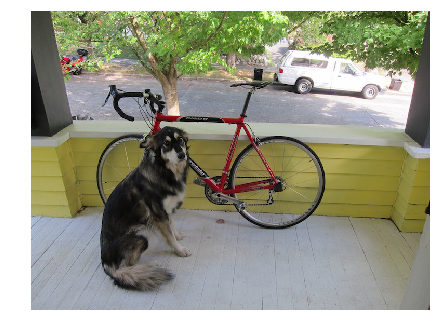

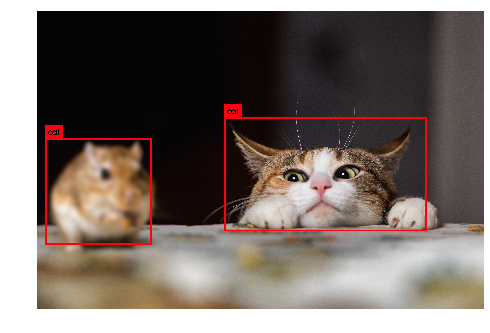

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

src = Image.open('/content/app/darknet/data/dog.jpg')
result = Image.open('/content/app/darknet/predictions.png')

plt.axis('off')
plt.imshow(np.asarray(src))
plt.show()

plt.axis('off')
plt.imshow(np.asarray(result))
plt.show()